In [1]:
import os
import sys
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

In [2]:
from PIL import ImageFont, Image
from IPython.display import display
from generator.util import load_dict
from generator import computer_text_generator, background_generator

## merge all dicts

In [3]:
dicts = sorted(os.listdir('../assets/dict'))
dicts = list(filter(lambda x: not x.startswith('merge') and x.endswith('.txt'), dicts))
dicts

['en.txt', 'ja.txt', 'ko.txt', 'latin.txt', 'zh_cn.txt', 'zh_tw.txt']

In [4]:
chars = set()
for d in dicts:
    with open('../assets/dict/' + d, "r", encoding="utf-8") as f:
        lines = f.readlines()
        charset = set([line.strip() for line in lines if line.strip()])
    chars.update(charset)
chars = list(chars)
# add upper case
chars += [c.upper() for c in chars]
# add lower case
chars += [c.lower() for c in chars]

chars = sorted(set(chars))
len(chars)

12824

In [5]:
with open('../assets/dict/merge_v1.txt', "w", encoding="utf-8") as f:
    f.write('\n'.join(chars))

## font support Char

In [50]:
f = ImageFont.truetype("../assets/font/ja/shiasatte.otf", 46)

In [51]:
mask = f.getmask('你')

mask_image = Image.new('L', mask.size)
mask_image.putdata(mask)

# 显示蒙版图像
display(mask_image)

<PIL.Image.Image image mode=L size=46x0>

In [53]:
mask.size

(46, 0)

In [14]:
from fontTools.ttLib import TTFont

In [25]:
ord('가')

44032

In [43]:
ft = TTFont("../assets/font/ko/나눔손글씨 나무정원.ttf")
l = ft.getBestCmap()
l[ord('你')]

KeyError: 20320

In [44]:
'uniC528' in ft['glyf']

True

In [22]:
'씨' in l

False

In [4]:
t = os.listdir('../assets/font/en')

In [ ]:
i = -1

In [21]:
i += 1
f = f'../assets/font/en/{t[i]}'
print(f, t[i])

../assets/font/en/Kalam-Regular.ttf Kalam-Regular.ttf


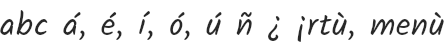

In [22]:
s = 'abc á, é, í, ó, ú ñ ¿ ¡rtù, menù'
image, mask = computer_text_generator.generate(
                    s,
                    f,
                    '#282828',
                    32,
                    0,
                    1,
                    1,
                    0,
                    False,
                    0,
                    '#ffffff',
                )
bg = background_generator.plain_white(image.height, image.width)
bg.paste(image, (0, 0), image)
display(bg)